1.주제선정 및 2.데이터수집

#### fish 길이에 따른 무게 예측
- 데이터셋 : fish.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 선형LinearRegression
- 피쳐 : 길이length
- 타겟: 무게weight



[1] 모듈 로딩 및 데이터 준비

In [21]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 

3.데이터 전처리 및 4. 데이터 분석

[2] 데이터분석 -탐색적 분석

In [65]:
## 데이터준비

data_file = '../data/fish.csv'
fishhDF = pd.DataFrame(pd.read_csv(data_file, header=None, 
                                   skiprows=73, skipfooter=31,
                                   usecols=[1,2], engine='python'))
fishhDF.head()
## 1 = weight
## 2 = length

,1,2
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4


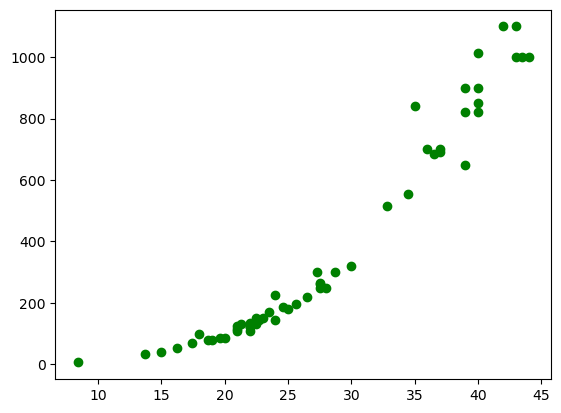

In [66]:
## 무게와 길이의 분포
plt.plot(fishhDF[2], fishhDF[1],'og')
plt.show()

- 탐색적 데이터 분석 결과
    - 데이터 분포 분석: 길이에 따른 무게가 증가하는 양상 보임
    - 주의 


5. 피처와 타겟 선정
- 피처feature - length
- 타겟target - weight

6. 학습방법 결정: 회귀/분류, 알고리즘
- 선형회귀 linearRegression

7. 학습용 데이터셋 준비: 학습용(검증용), 테스트용

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [68]:
## 3-1 피처와 타겟 분리
featureDF = fishhDF[[2]]
targetSR = fishhDF[1]
print(f"featureDF => {featureDF.ndim}D, targetSR => {targetSR.ndim}D")

featureDF => 2D, targetSR => 1D


In [69]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (42, 1) / X_test => 2D, (14, 1)
y_train => 1D (42,) / y_test => 2D, (14,)


8. 학습진행 - 학습용 데이터 X_train, y_train

In [70]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [71]:
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [36.57487032]
lr.intercept_ -643.0421972940421
X_train = 36.57487031541895*y_train + -643.0421972940421


9. 평가 훈련용 테스트용 데이터셋 성능 평가, 비용 계산

In [ ]:
## 모듈화
def check(traindataXY, testdataXY):
    resultDF = pd.DataFrame()
    for x, y in [[X_train,  y_train], [X_test, y_test]]:
        score = lr.score(x, y)
        pre_y = lr.predict(x)
        r2score = r2_score(y, pre_y)
        rmse = root_mean_squared_error(y, pre_y)
        mse = mean_squared_error(y, pre_y)
        mae = mean_absolute_error(y,pre_y)
    

In [73]:
result={}

In [74]:
score = lr.score(X_train, y_train)
pre_y = lr.predict(X_train)
r2score = r2_score(y_train, pre_y)
rmse = root_mean_squared_error(y_train, pre_y)
mse = mean_squared_error(y_train, pre_y)
mae = mean_absolute_error(y_train,pre_y)
print(f"score => {score:.2f}, r2score =>{r2score:.2f}, mse => {mse:.2f}, mae => {mae:.2f}")
result['train'] = [score, r2score,rmse, mse, mae]

score => 0.91, r2score =>0.91, mse => 10321.80, mae => 74.55


In [75]:
score = lr.score(X_test, y_test)
pre_y = lr.predict(X_test)
r2score = r2_score(y_test, pre_y)
rmse = root_mean_squared_error(y_test, pre_y)
mse = mean_squared_error(y_test, pre_y)
mae = mean_absolute_error(y_test,pre_y)
print(f"score => {score:.2f}, r2score =>{r2score:.2f}, mse => {mse:.2f}, mae => {mae:.2f}")
result['test'] = [score, r2score,rmse, mse, mae]

score => 0.94, r2score =>0.94, mse => 7623.45, mae => 71.77


In [76]:
result

{'train': [0.9112370138200264,
  0.9112370138200264,
  101.59625355304917,
  10321.798736015457,
  74.55108675301166],
 'test': [0.9377981943997282,
  0.9377981943997282,
  87.31236958639187,
  7623.449882790687,
  71.77102346804236]}

In [77]:
rDF = pd.DataFrame(result).T
rDF.columns=['score', 'r2score','rmse', 'mse', 'mae']
rDF

,score,r2score,rmse,mse,mae
train,0.911237,0.911237,101.596254,10321.798736,74.551087
test,0.937798,0.937798,87.312370,7623.449883,71.771023


In [78]:
## 성능차이 행 추가
rDF.loc['diff'] = (rDF.loc['train']-rDF.loc['test']).abs()

In [84]:
rDF.round(4)

,score,r2score,rmse,mse,mae
train,0.9112,0.9112,101.5963,10321.7987,74.5511
test,0.9378,0.9378,87.3124,7623.4499,71.7710
diff,0.0266,0.0266,14.2839,2698.3489,2.7801


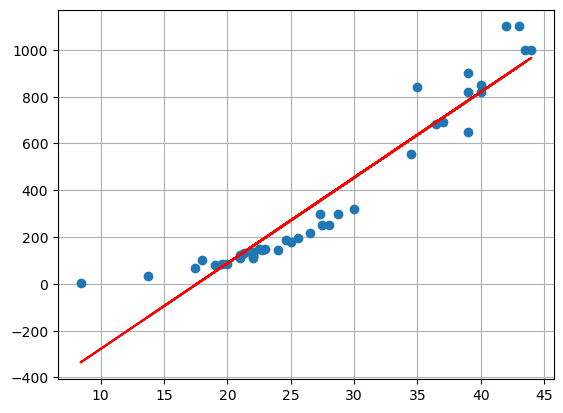

In [ ]:
##회귀선 긋기
plt.plot(X_train, y_train, 'o')

#선형회귀에서 구한 y=lr.coef_x* lr.intercept_ 
# 
plt.plot(X_train, lr.predict(X_train), 'r-')
plt.grid()
plt.show()

10. 평가결과
- 훈련 데이터_train 보다 테스트용 데이터_test에서 
- 모델적합도 : score와 r2score는 더 높음 :최적
- 비용 계산값(손실값) : mse와 mae는 더 낮게 나타남
- 최적적합에 해당한다고 볼 수 있음.


만약 과대적합이라면.
- [해결방안]
* 과도한 반복학습 => scikit-leartn 에서는 개발자 제어 불가.
* 모델이 복잡한가? => 피쳐가 많은가? 피쳐는 1개임
* 데이터가 충분한가? => 데이터 충분하지 않음
* 해당 알고리즘의 결과물 분석 => 완전한 선형 아님. 곡선형.

11. 웹/앱 서비스 제공